In [4]:
import pandas as pd

df = pd.read_csv("temp.csv")
df

,source,target,date
0,9907233,9301253,1999-07-05
1,9907233,9504304,1999-07-05
2,9907233,9505235,1999-07-05
3,9907233,9506257,1999-07-05
4,9907233,9606402,1999-07-05
...,...,...,...
424103,9912461,9305269,1999-12-22
424104,9912461,9609445,1999-12-22
424105,9912461,9902379,1999-12-22
424106,9912461,9902403,1999-12-22


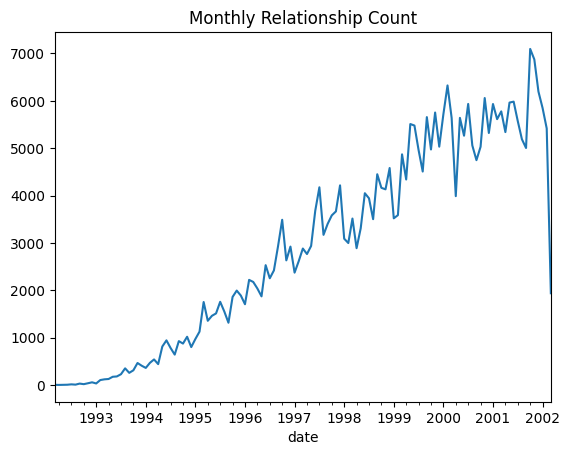

In [20]:
df['date'] = pd.to_datetime(df['date'])

earliest_date = df['date'].min()
latest_date = df['date'].max()
date_distribution = df['date'].value_counts().sort_index()


df.set_index('date').resample('M').size().plot(title='Monthly Relationship Count')
daily_aggregation = df.resample('D', on='date').size()



In [17]:
for i in range(1,13):
    print("Month-" + str(i) +" publications ="+ str(len(df[df['date'].dt.month == i])))


Month-1 publications =29545
Month-2 publications =30468
Month-3 publications =29205
Month-4 publications =23278
Month-5 publications =27676
Month-6 publications =29619
Month-7 publications =29612
Month-8 publications =26394
Month-9 publications =28714
Month-10 publications =31391
Month-11 publications =32625
Month-12 publications =31417


In [19]:
import networkx as nx

import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(data, 'source', 'target', create_using=nx.DiGraph())


clustering_coefficients_over_time = [nx.average_clustering(G.subgraph(nodes)) for nodes in nx.connected_components(G.to_undirected())]
plt.plot(date, clustering_coefficients_over_time, marker='o')
plt.title('Temporal Clustering Coefficient')
plt.xlabel('Time')
plt.ylabel('Clustering Coefficient')
plt.show()


NameError: name 'date' is not defined

In [ ]:
diameters_over_time = [nx.diameter(G.subgraph(nodes)) for nodes in nx.connected_components(G.to_undirected())]
plt.plot(timestamps, diameters_over_time, marker='o')
plt.title('Temporal Diameter')
plt.xlabel('Time')
plt.ylabel('Diameter')
plt.show()

